# Project: Investigating The Appointment Availability Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Resources used to make this notebook possible:
> - [stackoverflow](https://stackoverflow.com)
> - [matplotlib.pyplot documentations](https://matplotlib.org)
> - [pandas documentation](https://pandas.pydata.org)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no null data sets thats great
The following columns need to be dropped as they will not be exactly useful for this analysis
- PatientID(unique identifier for patient)
- AppointmentID(unique identifier for the appointment)

Some columns datatypes need to be also be altered.
- ScheduledDay and AppointmentDay need to be changed to datetime for easy querying

There also appears to be a negative age, but **age can't be negative** 


### Data Cleaning

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


#### Droppping of Columns not used for the Analysis
- PatientID and AppointmentID

In [5]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Dropping the columns

In [6]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Assigning Proper datatypes
- ScheduleDay to datetime
- AppointmentDay to datetime

In [7]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

Gender                         object
ScheduledDay                   object
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [8]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

Removing spaces and using '_' as delimiter for column names

In [10]:
df.rename(columns=lambda  x:x.replace(' ', '_').lower().replace('-', '_'), inplace=True)
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

In [11]:
df.rename(columns={'hipertension': 'hypertension'}, inplace=True)
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

#### Droppping of Negative Age Rows

Checking which rows had the problem of negative age

In [12]:
df.query('age < 0')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
df.drop(df[df['age'] < 0].index, axis=0, inplace=True)

Checking to see that the rows involved were successfully dropped

In [14]:
df.query('age < 0')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show


In [15]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Changing of values in the no_show column
I will be changing the 'no_show' column to 'showed', then also changing the values in the column.

Changing yes to no and no to yes

To account for the change in column name


In [16]:
df.loc[df.no_show=='Yes','no_show'] = 0
df.loc[df.no_show=='No','no_show'] = 1
# now yes = 1, no = 1

df.loc[df.no_show==0,'no_show'] = 'No'
df.loc[df.no_show==1,'no_show'] = 'Yes'

df.rename(columns={"no_show": "showed"}, inplace = True)

In [17]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


#### splitting the dataset

In [18]:
df['showed'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df_no_show = df[df['showed'] == 'No']
df_show = df[df['showed'] == 'Yes']

df.shape[0] == len(df_no_show) + len(df_show)

True

In [20]:
df_no_show.shape, df_show.shape

((22319, 12), (88207, 12))

Now let's drop the 'showed' column as we have already split our dataset

In [21]:
df_no_show.drop('showed', axis=1,inplace=True)
df_show.drop('showed', axis=1,inplace=True)
display(df_no_show.head(1), df_show.head(1))

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0


In [22]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110526 non-null  object             
 1   scheduledday    110526 non-null  datetime64[ns, UTC]
 2   appointmentday  110526 non-null  datetime64[ns, UTC]
 3   age             110526 non-null  int64              
 4   neighbourhood   110526 non-null  object             
 5   scholarship     110526 non-null  int64              
 6   hypertension    110526 non-null  int64              
 7   diabetes        110526 non-null  int64              
 8   alcoholism      110526 non-null  int64              
 9   handcap         110526 non-null  int64              
 10  sms_received    110526 non-null  int64              
 11  showed          110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


In [24]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [25]:
df.showed.unique()

array(['Yes', 'No'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis



### How does Gender Affect Showing up

In [26]:
# defining a function for  sizes plot labels and title 

def plot_labels(x, y, title):
    plt.xlabel(x, fontdict={'size':13})
    plt.ylabel(y, fontdict={'size':13})
    plt.title(title, fontdict={'size':15})

In [27]:
df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [28]:
(df['gender'].value_counts()/ 110526) * 100

F    64.997376
M    35.002624
Name: gender, dtype: float64

The percentages for each gender

<AxesSubplot:ylabel='gender'>

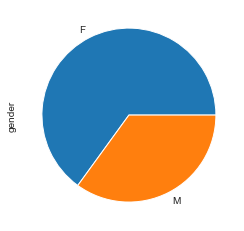

In [29]:
df['gender'].value_counts().plot(kind='pie')

In [30]:
gender_group = df.groupby('showed')['gender'].value_counts()
gender_group

showed  gender
No      F         14594
        M          7725
Yes     F         57245
        M         30962
Name: gender, dtype: int64

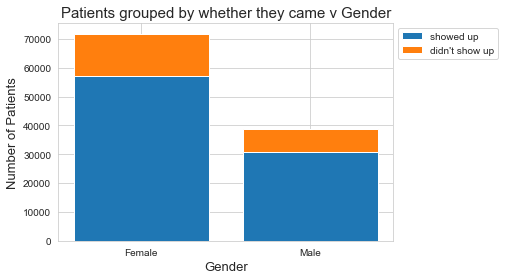

In [31]:
gender = ['Female', 'Male']
plt.bar([1, 2], gender_group.loc['Yes'], label="showed up", tick_label=gender)
plt.bar([1, 2], gender_group.loc['No'], bottom=gender_group.loc['Yes'], label="didn't show up", tick_label=gender)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

plot_labels(x='Gender', y='Number of Patients', title='Patients grouped by whether they came v Gender');

In [32]:
df.groupby(['showed', 'gender'])['gender'].value_counts()

showed  gender  gender
No      F       F         14594
        M       M          7725
Yes     F       F         57245
        M       M         30962
Name: gender, dtype: int64

**Let's see the proportion**

In [33]:
gender_by_show = df.groupby(['showed', 'gender'])['gender'].count()
total = df.groupby(['gender'])['gender'].count()
gender_by_show , total
proportion = gender_by_show / total
proportion

showed  gender
No      F         0.203149
        M         0.199679
Yes     F         0.796851
        M         0.800321
Name: gender, dtype: float64

In [34]:
print("Proportion of those who show up when compared to total appointments\n", proportion.loc['Yes'])
proportion.loc['Yes'] * 100

Proportion of those who show up when compared to total appointments
 gender
F    0.796851
M    0.800321
Name: gender, dtype: float64


gender
F    79.685129
M    80.032052
Name: gender, dtype: float64

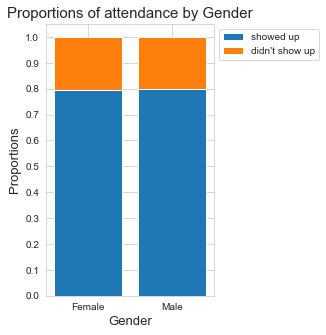

In [35]:
gender = df.gender.unique() # Array of [F, M]
plt.figure(figsize=(3, 5))
gender = ['Female', 'Male']
plt.bar(gender, proportion.loc['Yes'], label='showed up')
plt.bar(gender, proportion.loc['No'], bottom=proportion.loc['Yes'], label='didn\'t show up')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")     # positioning the legend

plot_labels(x='Gender', y='Proportions', title='Proportions of attendance by Gender')

plt.yticks([i/10 for i in range(0, 11)]);

From here, we can see that **71 839 _Females_** and **38 687 _Males_** were scheduled for appointment.

So Females are **65 %** of those scheduled for appointment 

Female - **57 245** showed up, **14 594** didn't

Male - **30 962** came, **7 725** didn't come

So obviously more females were not seen but this is obviously due to the fact that more females were scheduled for appointment

Therefore we can conclude that **80% of Males** showed up and **79.69 of Females** showed up, which is actually pretty close

### Is There A Time Factor

In [36]:

df_no_show.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0


In [37]:
time_diff = df_no_show['appointmentday'] - df_no_show['scheduledday']
time_diff.describe()

count                         22319
mean     15 days 08:17:34.998879878
std      16 days 14:24:19.715831697
min               -7 days +10:10:40
25%                 3 days 10:47:25
50%                10 days 07:42:31
75%                22 days 15:44:33
max               178 days 13:19:01
dtype: object

In [38]:
time_diff = df_show['appointmentday'] - df_show['scheduledday']
time_diff.describe()

count                         88207
mean      8 days 06:56:54.710306438
std      14 days 12:57:16.469157062
min               -1 days +03:15:06
25%        -1 days +14:58:59.500000
50%                 1 days 14:56:46
75%                11 days 15:25:57
max               178 days 13:17:18
dtype: object

In [39]:
df_no_show['appointmentday'].nunique()

27

In [40]:
df_show['appointmentday'].nunique()

27

In [41]:
df.query('appointmentday < scheduledday')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
110511,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,Yes
110512,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,Yes
110513,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,Yes
110514,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,Yes


In [42]:
df_no_show.query('appointmentday < scheduledday').shape, df_show.query('appointmentday < scheduledday').shape

((1797, 11), (36770, 11))

In [43]:
df[df['appointmentday'] < df['scheduledday']].sort_values('appointmentday').iloc[0:30]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
2220,M,2016-04-29 16:46:56+00:00,2016-04-29 00:00:00+00:00,4,SÃO BENEDITO,0,0,0,0,0,0,Yes
2223,F,2016-04-29 16:06:07+00:00,2016-04-29 00:00:00+00:00,20,GURIGICA,1,0,0,0,0,0,Yes
2224,F,2016-04-29 14:16:07+00:00,2016-04-29 00:00:00+00:00,42,HORTO,0,0,0,0,0,0,Yes
2225,M,2016-04-29 15:18:16+00:00,2016-04-29 00:00:00+00:00,61,CONSOLAÇÃO,0,0,1,1,0,0,Yes
2229,M,2016-04-29 12:20:48+00:00,2016-04-29 00:00:00+00:00,1,SÃO BENEDITO,1,0,0,0,0,0,Yes
2234,M,2016-04-29 11:03:29+00:00,2016-04-29 00:00:00+00:00,57,CONSOLAÇÃO,0,0,0,0,0,0,Yes
2236,F,2016-04-29 10:32:16+00:00,2016-04-29 00:00:00+00:00,20,CONSOLAÇÃO,1,0,0,0,0,0,Yes
2237,F,2016-04-29 09:43:52+00:00,2016-04-29 00:00:00+00:00,72,SÃO BENEDITO,0,1,0,0,0,0,Yes
2238,F,2016-04-29 09:15:14+00:00,2016-04-29 00:00:00+00:00,59,CONSOLAÇÃO,0,0,0,0,0,0,Yes


In [44]:
time_diff = df['appointmentday'] - df['scheduledday']
time_diff

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
                ...       
110522    34 days 14:44:25
110523    34 days 16:32:27
110524    40 days 07:56:08
110525    40 days 08:50:37
110526    40 days 10:29:04
Length: 110526, dtype: timedelta64[ns]

In [45]:
time_diff.idxmin()

71533

In [46]:
df.iloc[71533]

gender                                    F
scheduledday      2016-05-11 13:49:20+00:00
appointmentday    2016-05-05 00:00:00+00:00
age                                      81
neighbourhood                 SANTO ANTÔNIO
scholarship                               0
hypertension                              0
diabetes                                  0
alcoholism                                0
handcap                                   0
sms_received                              0
showed                                   No
Name: 71533, dtype: object

### How is Age Affecting People's Commitement to Appointments

In [47]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

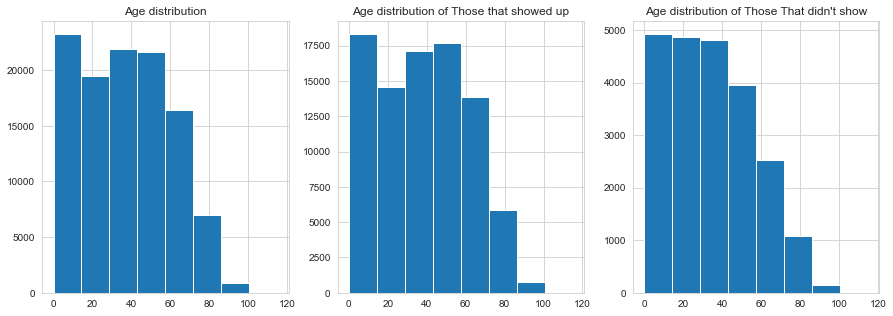

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

df.age.hist(bins=8, ax=axs[0])
axs[0].set_title("Age distribution")

df_show.age.hist(bins=8, ax=axs[1])
axs[1].set_title("Age distribution of Those that showed up")

df_no_show.age.hist(bins=8, ax=axs[2])
axs[2].set_title("Age distribution of Those That didn't show");

The left gives us the total distribution, The older the age the less people for appointment

The center chart,  the trend is the older you are the more probability for you to show up

The left chart of those that didn't show gave us a downward trend

**Grouping into categories for better explanation**

In [49]:
# Babies - 0 to 2
# Children - 3 to 16
# Young Adults - 17 to 30
# Adults - 31 to 60
# Seniors - 60 above

bin_edges = [0, 2, 16, 30, 60, 115]
bin_names = ['baby', 'child', 'young_adult', 'adult', 'senior']
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names, include_lowest=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,senior
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,adult
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,senior
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,child
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,adult


In [50]:
# to ensure no age was skipped
df[df.age_group.isnull()]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed,age_group


Let's do the same for the df_no_show and df_show

In [51]:
for data in [df_no_show, df_show]:
    data['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names, include_lowest=True)
    
display(df_no_show.head(1), df_show.head(1))

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,age_group
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,young_adult


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,senior


In [52]:
aging = df.groupby(['showed', 'age_group'])['showed'].count()
total_age = df.groupby(['age_group'])['age_group'].count()
aging, total_age
age_prop = aging / total_age
age_prop

showed  age_group  
No      baby           0.175774
        child          0.232918
        young_adult    0.247407
        adult          0.195489
        senior         0.152110
Yes     baby           0.824226
        child          0.767082
        young_adult    0.752593
        adult          0.804511
        senior         0.847890
dtype: float64

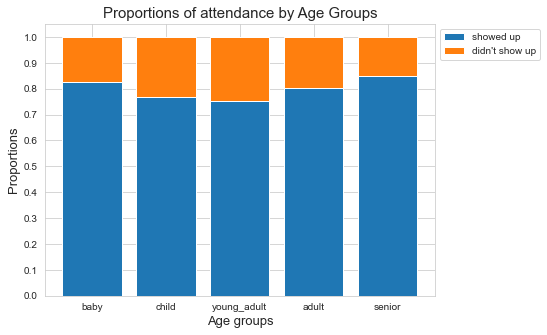

In [53]:
plt.figure(figsize=(7, 5))
age_grouping = df.age_group.unique().sort_values()
                # ['baby', 'child', 'young_adult', 'adult', 'senior']
    
plt.bar(age_grouping, age_prop.loc["Yes"], label="showed up")
plt.bar(age_grouping, age_prop.loc["No"], bottom=age_prop.loc["Yes"], label="didn't show up")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")    # positioning the legend

plot_labels(x='Age groups', y='Proportions', title='Proportions of attendance by Age Groups')

plt.yticks([i/10 for i in range(0, 11)]);

From the chart above we can clearly see that extreme ages(baby and seniors), more of them showed up.

The age group with the least proportion of those who showed are the young adults.

Considering using multiple features(age and gender) to analyze

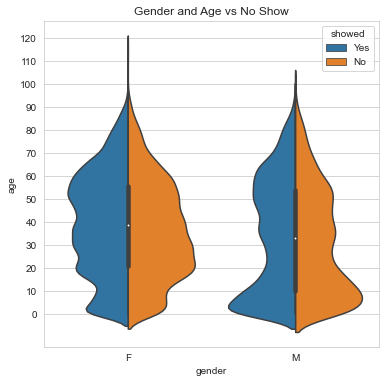

In [54]:
f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.violinplot(x="gender",y="age", hue="showed", data=df, split=True, ax=ax)
ax.set_title('Gender and Age vs No Show')
ax.set_yticks(range(0,130,10));


From this we can see that most of the Males who didn't show are from 15 to 60, while for the female it was from the ages 0 - 20. Also from this visual we can see that most of the Males that were given appointments were more in the children age(0 - 20) While Males were more dominant in the range of 10 - 60. Let's use a histogram to back this up

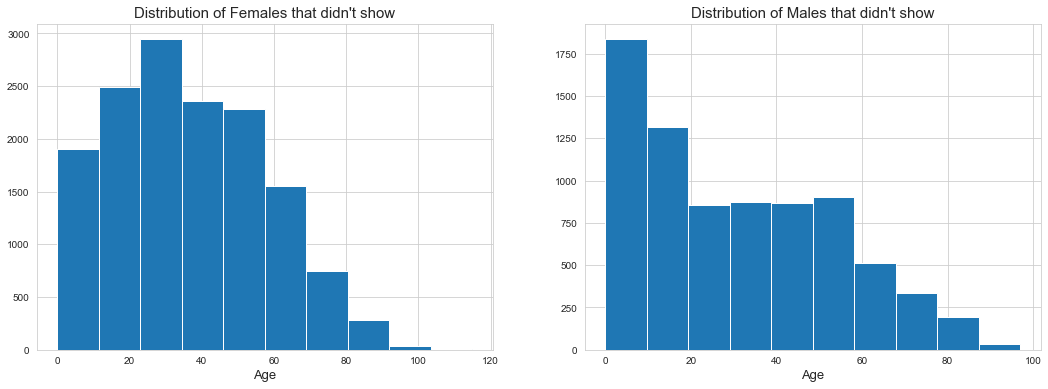

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

df_no_show.query('gender == "F"')['age'].hist(ax=axs[0])
axs[0].set_title("Distribution of Females that didn't show", fontdict={'size': 15})
axs[0].set_xlabel('Age', fontdict={'size': 13})

df_no_show.query('gender == "M"')['age'].hist(ax=axs[1])
axs[1].set_title("Distribution of Males that didn't show", fontdict={'size': 15})
axs[1].set_xlabel('Age', fontdict={'size': 13});

So it settled, Females that didn't show up are more from the 15 - 60 range

Males however are in the 0 - 20 range

### Is Scholarship a deterrent?
How does having the scholarship treatment affect  commitement to appointment

In [56]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,senior


In [57]:
df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [58]:
sch = df.groupby(['showed', 'scholarship'])['showed'].count()
total_sch = df.groupby('scholarship')['scholarship'].count()

sch_prop = sch / total_sch
sch, total_sch, sch_prop

(showed  scholarship
 No      0              19741
         1               2578
 Yes     0              79924
         1               8283
 Name: showed, dtype: int64,
 scholarship
 0    99665
 1    10861
 Name: scholarship, dtype: int64,
 showed  scholarship
 No      0              0.198074
         1              0.237363
 Yes     0              0.801926
         1              0.762637
 dtype: float64)

In [59]:
df['scholarship'].value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [60]:
(df['scholarship'].value_counts()/ 110526) * 100

0    90.173353
1     9.826647
Name: scholarship, dtype: float64

The percentages for those with scholarship.

- 0 - do not have scholarship
- 1 - have scholarship

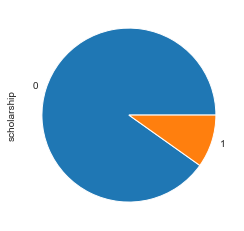

In [61]:
df['scholarship'].value_counts().plot(kind='pie');

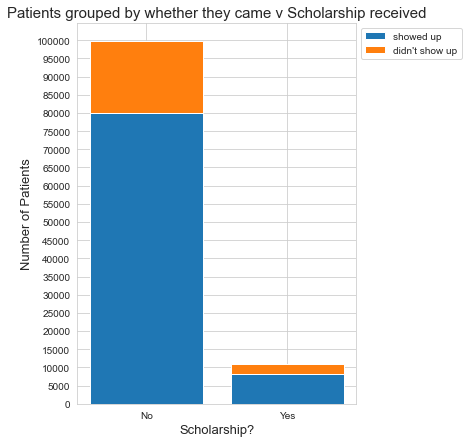

In [62]:
plt.figure(figsize=(5, 7))
plt.bar([0, 1], sch.loc['Yes'], label="showed up", tick_label=['No', 'Yes'])
plt.bar([0, 1], sch.loc['No'], bottom=sch.loc['Yes'], label="didn't show up", tick_label=['No','Yes'])
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

plot_labels(x='Scholarship?', y='Number of Patients', title='Patients grouped by whether they came v Scholarship received')

plt.yticks(range(0, 105000, 5000));

**Let's see the proportion**

In [63]:
print("Proportion of those who show up when compared to total appointments\n", sch_prop.loc['Yes'])


Proportion of those who show up when compared to total appointments
 scholarship
0    0.801926
1    0.762637
dtype: float64


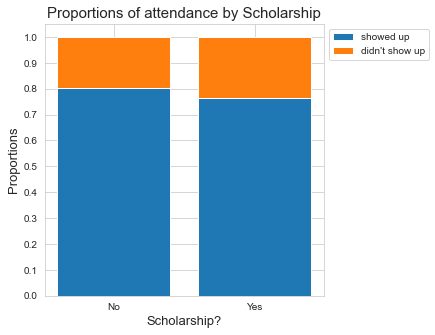

In [64]:
plt.figure(figsize=(5, 5))
# sch_grouping = df.groupby(['scholarship'])['scholarship'].count().index 
                # [0, 1]
sch_grouping = df.scholarship.unique()
plt.bar(sch_grouping, sch_prop.loc["Yes"], label="showed up", tick_label=['No', 'Yes'])
plt.bar(sch_grouping, sch_prop.loc["No"], bottom=sch_prop.loc["Yes"], label="didn't show up")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")    # positioning the legend

plot_labels(x='Scholarship?', y='Proportions', title='Proportions of attendance by Scholarship')

plt.yticks([i/10 for i in range(0, 11)]);

From here, we can see that **99 665 _people with scholarship_** and **10 861 _people without scholarship_** were scheduled for appointment.

So those with scholarship are **9.83 %** of those scheduled for appointment 

With scholarship - **8 283** showed up, **2 578** didn't

without scholarship - **79 924** came, **19 741** didn't come

So obviously more people without scholarship were not seen but this is obviously due to the fact that most of the people scheduled for appointment are without scholarship

We can also see that **80.19% of those without scholarship** showed up and **76.26% of those with scholarship** showed up

More of those without scholarship actually turned up when compared to those with scholarship

### How does receiving an SMS correlate with showing up?

In [65]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,senior


In [66]:
df['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

In [67]:
df['sms_received'].value_counts() / df['sms_received'].count()

0    0.678971
1    0.321029
Name: sms_received, dtype: float64

In [68]:
sms_group = df.groupby(['showed'])['sms_received'].value_counts()
sms_group

showed  sms_received
No      0               12535
        1                9784
Yes     0               62509
        1               25698
Name: sms_received, dtype: int64

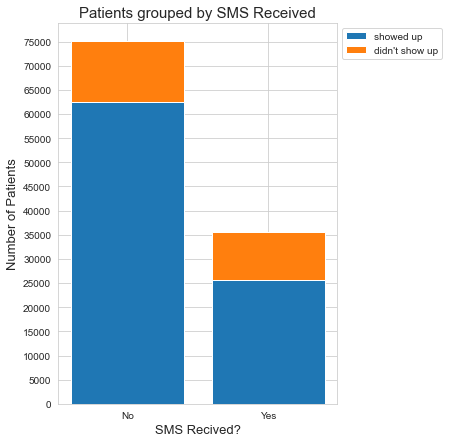

In [69]:
plt.figure(figsize=(5, 7))
plt.bar([0, 1], sms_group.loc['Yes'], label="showed up", tick_label=['No', 'Yes'])
plt.bar([0, 1], sms_group.loc['No'], bottom=sms_group.loc['Yes'], label="didn't show up", tick_label=['No','Yes'])
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

plot_labels(x='SMS Recived?', y='Number of Patients', title='Patients grouped by SMS Received')

plt.yticks(range(0, 80000, 5000));

Let's check the proportion

In [70]:
sms = df.groupby(['showed', 'sms_received'])['showed'].count()
total_sms = df.groupby('sms_received')['sms_received'].count()

sms_prop = sms / total_sms
sms, total_sms, sms_prop

(showed  sms_received
 No      0               12535
         1                9784
 Yes     0               62509
         1               25698
 Name: showed, dtype: int64,
 sms_received
 0    75044
 1    35482
 Name: sms_received, dtype: int64,
 showed  sms_received
 No      0               0.167035
         1               0.275745
 Yes     0               0.832965
         1               0.724255
 dtype: float64)

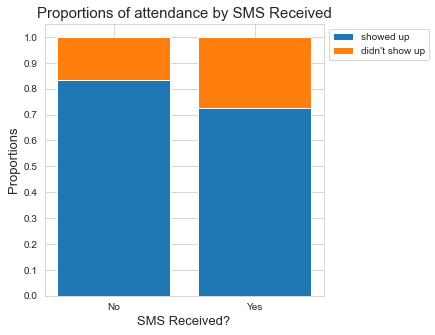

In [71]:
plt.figure(figsize=(5, 5))
# sch_grouping = df.groupby(['scholarship'])['scholarship'].count().index 
                # [0, 1]
sms_grouping = df.sms_received.unique()
plt.bar(sms_grouping, sms_prop.loc["Yes"], label="showed up", tick_label=['No', 'Yes'])
plt.bar(sms_grouping, sms_prop.loc["No"], bottom=sms_prop.loc["Yes"], label="didn't show up")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")    # positioning the legend

plot_labels(x='SMS Received?', y='Proportions', title='Proportions of attendance by SMS Received')

plt.yticks([i/10 for i in range(0, 11)]);

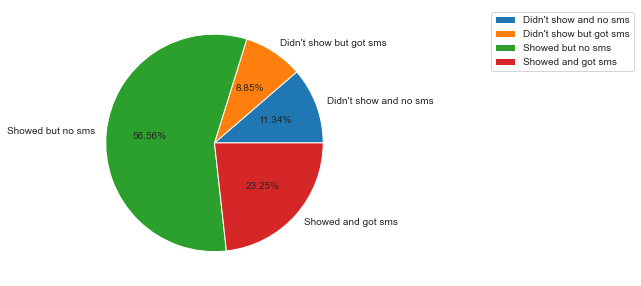

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sms_showed = sms / df['sms_received'].count()
label = ["Didn't show and no sms", "Didn't show but got sms", "Showed but no sms", "Showed and got sms"]
plt.pie(sms_showed, labels=label, autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper left");

From here, we can see that **75 044 _people got the sms_** and **35 482 _people didn't get any sms_** were scheduled for appointment.

So those that got sms are **67.9 %** of those scheduled for appointment 

Got sms - **25 698** showed up, **9 784** didn't

Didn't get any sms - **62 509** came, **12 535** didn't come

We can also see that **83.3% of those who didn't get any sms** showed up and **72.4% of those who got sms** showed up

One would think that more of those who received sms would come more, but otherwise is the case

In [73]:
no_show_age = df_no_show.groupby(['sms_received', 'age_group'])['sms_received'].count()
total_age = df_no_show.groupby(['age_group'])['age_group'].count()
no_show_age, total_age
no_show_age_prop = no_show_age / total_age
no_show_age_prop

sms_received  age_group  
0             baby           0.590352
              child          0.593248
              young_adult    0.517284
              adult          0.550833
              senior         0.607784
1             baby           0.409648
              child          0.406752
              young_adult    0.482716
              adult          0.449167
              senior         0.392216
dtype: float64

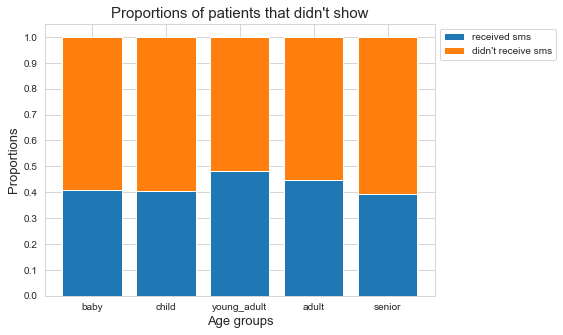

In [74]:
plt.figure(figsize=(7, 5))
age_grouping = df.age_group.unique().sort_values()
                # ['baby', 'child', 'young_adult', 'adult', 'senior']
    
plt.bar(age_grouping, no_show_age_prop.loc[1], label="received sms")
plt.bar(age_grouping, no_show_age_prop.loc[0], bottom=no_show_age_prop.loc[1], label="didn't receive sms")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")    # positioning the legend

plot_labels(x='Age groups', y='Proportions', title='Proportions of patients that didn\'t show')

plt.yticks([i/10 for i in range(0, 11)]);

In [75]:
show_age = df_show.groupby(['sms_received', 'age_group'])['sms_received'].count()
total_age = df_show.groupby(['age_group'])['age_group'].count()
show_age, total_age
show_age_prop = show_age / total_age
show_age_prop

sms_received  age_group  
0             baby           0.784291
              child          0.718204
              young_adult    0.708849
              adult          0.694079
              senior         0.704404
1             baby           0.215709
              child          0.281796
              young_adult    0.291151
              adult          0.305921
              senior         0.295596
dtype: float64

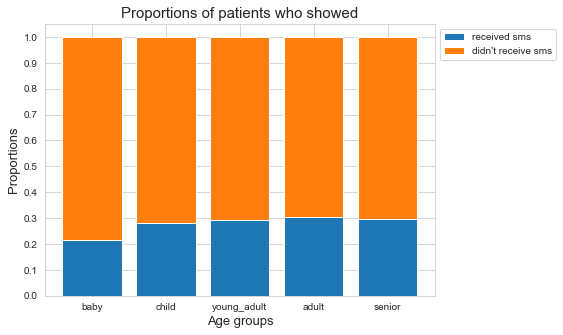

In [76]:
plt.figure(figsize=(7, 5))
age_grouping = df.age_group.unique().sort_values()
                # ['baby', 'child', 'young_adult', 'adult', 'senior']
    
plt.bar(age_grouping, show_age_prop.loc[1], label="received sms")
plt.bar(age_grouping, show_age_prop.loc[0], bottom=show_age_prop.loc[1], label="didn't receive sms")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")    # positioning the legend

plot_labels('Age groups', 'Proportions', 'Proportions of patients who showed')

plt.yticks([i/10 for i in range(0, 11)]);

<a id='conclusions'></a>
## Conclusions


I used Pie charts and bar charts mostly because the target data was categorical, either you show up or you don't.
I used stack bar charts to even further show my findings

<ol>
<li>Gender</li>
Most of the people who had appointments were Females.<br>
Greater proportion of males showed up than females.
    

<li>Receiving SMS</li>
The most suprising discovery<br>
More of those who didn't recieve sms showed up<br>
Babies had the most proportion of those who didn't receive sms<br>
Young adults had the greatest proportion of those who didn't show<br>

    
<li>Age</li>
We see that extreme ages (babies and seniors) were strongly correlated to showing up as more proportion of those age group<br> showed up compared to other age groups<br>
Most of the people who had appointments were young adults.<br>
</ol>

**Limitations**

- There's a bit of limitation to the sms received data, as we don't know the conditions they were sent
- The data given were mostly categorical so not a lot of conclusions could easily be drawn